## Introdução

Continuaremos nossa análise exploratória enquanto examinamos uma **variável aleatória**. Daremos prioridade para soluções movidas por modelos de machine learning, atrelados à pacotes relacionais a na área; vamos conhecer técnicas para avaliar nossos modelos de predição. 

Por fim, levaremos para o plano empresarial, focando na análise financeira.

### Bibliotecas e funções de visualização

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression

In [24]:
%matplotlib inline

In [25]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['figure.figsize'] = [20, 10]

## Por onde vamos começar?

Vamos começar com o objetivo de encontrar a proporção da classe positiva, obtendo a média da variável de resposta no dataset inteiro. Ela é a interpretação da taxa de inadimplência.

## Examinando a variável de resposta e concluindo a exploração inicial

A variável de resposta, para o nosso problema, ele é uma flag binária indicando se uma conta ou não ficará ou não inadimplente no próximo mês, que seria outubro no histórico do dataset.

Criaremos um modelo preditivo de **classificação binária**, ou seja, uma classe positiva e outra negativa.

In [26]:
df = pd.read_csv('/content/drive/MyDrive/DADOS/dados_limpos_usuarios_de_credito_DATACLEAN.csv')
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

A obtenção da média da coluna acima é de 22% para nossa classe positiva (inadimplência = 1). Essa é uma proporção da amostra também conhecida como **fração da classe**.

Na classificação binária, os datasets são descritos considerando se eles são **balanceados** ou **desbalanceados**: as proporções de amostras positivas e negativas são simétricas?

Geralmente, a maioria dos modelos de classificação de machine learning são progetadas para operarem com dados balanceados: uma divisão 50/50 entre as classes.

No entanto, raramente os dados são balanceados na vida real. Mas não quer dizer que não haja métodos que lidam com dados desbalanceados.Tais como:

* **Subamostragem (undersampling)**: da classe majogitária: eliminar aleatóriamente amostras da classe majoritária até as frações das classses serem iguais, ou no mínimo serem menos desbalanceadas;
* **Sobreamostragem (oversampling)**: da classe minoritária: adicionar aleatóriamente amostras duplicadas da classe minoritária para atingir o mesmo objetivo;
* **Ponderação de amostras (weighting samples)**: esse método é executado como parte da etapa de treinamento, para que a classe minoritária receba coletivamente a mesma "ênfase" da classe majoritária no modelo ajustado. O efeito é semelhante ao do oversampling.

Embora nossos dados não estejam balanceados, é bom ressaltar que uma fração pequena, que seja abaixo de 50%, não é particularmente um desbalanceamento. Normalmente, algumas áreas, como a detecção de fraudes, lidam com frações de classes positivas na ordem de 1% ou menos. Isso ocorre porque a proporção de "malfeitores" é muito pequena em comparação com o conjunto total de transações; ao mesmo tempo, é importante identificá-los se possível.

À medida que criamos modelos e geramos novos resultados, é recomendável pensar no que esses resultados informam sobre os dados, o que em geral requer uma volta rápida à fase de exploração.

E para essa volta de exploração, vamos focar em **examinar o relacionamento entre os atributos e as respostas.**

Agora uma boa prática como profissional na área de ciencia de dados. Em uma fase de relacionar atributos e respostas, tenha em mente essas seguintes perguntas:

* Os dados estão completos? **Há valores ausentes, anomalias ou dicrepâncias?**
* Os dados são consistentes? **A distribuição muda com o tempo? Essa mudança tem alguma relação?**
* Os dados como um todo fazem sentido? **Os valores das características correspondem à sua definição no dicionário de dados?**

Respostas insatisfatórias em qualquer uma dessas perguntas devem ser corrigidas antes do projeto dar continuidade.

## Criando modelos de machine learning com o pacote SCIKIT-LEARN

Vamos começar com um dos modelos de classificação mais importantes por sua praticidade e interpretabilidade, a **regressão logística**. Vamos instanciá-lo a partir da classe fornecida pelo scikit-learn. Isso significa dizer que você estará obtendo o blueprint do modelo e criando um modelo útil a partir dele. 

In [27]:
# criando um objeto, configurando os parâmetros e guardando em uma variável
my_lr = LogisticRegression(C= 0.1,
                           class_weight= None,
                           dual= False,
                           fit_intercept= True,
                           intercept_scaling= 1,
                           max_iter= 100,
                           multi_class= 'warn',
                           n_jobs= None,
                           penalty= 'l2',
                           random_state= None,
                           solver= 'liblinear',
                           tol= 0.0001,
                           verbose= 0,
                           warm_start= False) 
my_lr

LogisticRegression(C=0.1, multi_class='warn', solver='liblinear')

## Gerando dados sintéticos

Para ter dados para ajustar, você gerará seus próprios dados sintéticos. Teremos o auxilio da biblioteca *random* do NumPy para a geração de números aleatórios.

Para começar, usaremos o NumPy para criar um array unidimencional de valores e carcterísticas chamado X e composto por 1.000 números reais aleatórios (inteiros e decimais) entre 0 e 10. Empregaremos um **seed** para o gerador de números aleatórios. Em seguida, criaremos uma uniformidade que retornará um array com o tamanho (size) que você especificar. Criaremos um array unidimencional (vetor) composto por 1.000 elementos e examinaremos os 10 primeiros.

In [28]:
np.random.seed(seed= 1)

In [29]:
X = np.random.uniform(low= 0.0,
                      high= 10.0,
                      size= (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

## Dados para uma regressão linear

Agora vamos criar uma variável de resposta. Geraremos dados que se baseiam nas suposições da regressão linear: obedeçam a uma tendência linear, mas tem erros normalmente distribuídos. Teoricamente, a regressão linear só deve ser usada para modelar dados em que a resposta seja uma tranformação linear das características, com ruído normalmente distribuído (também chamado de **ruído gaussiano**).

Para criar os dados de regressão linear, primeiro definiremos o seed aleatório e em seguida, declaremos variáveis para a inclinação e a interceptação de nossos dados lineares. Depois criaremos a variável de resposta usando a equação familiar de uma linha, com o acréssimo de algum ruído gaussiano: um array de 1.000 pontos de dados com a mesma dimensão (size) do array de características, X, em que a média de ruído (loc) é 0 e desvio padrão (scale) é 1. Isso adicionará uma pequena "expansão" aos dados lineares.

In [30]:
np.random.seed(seed= 1)

In [31]:
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc= 0.0,
                                 scale= 1.0,
                                 size= (1000,)) + intercept

Agora queremos visualizar os dados. Criaremos um gráfico de dispersão (scatter) onde vamos plotar y em relação à característica X.

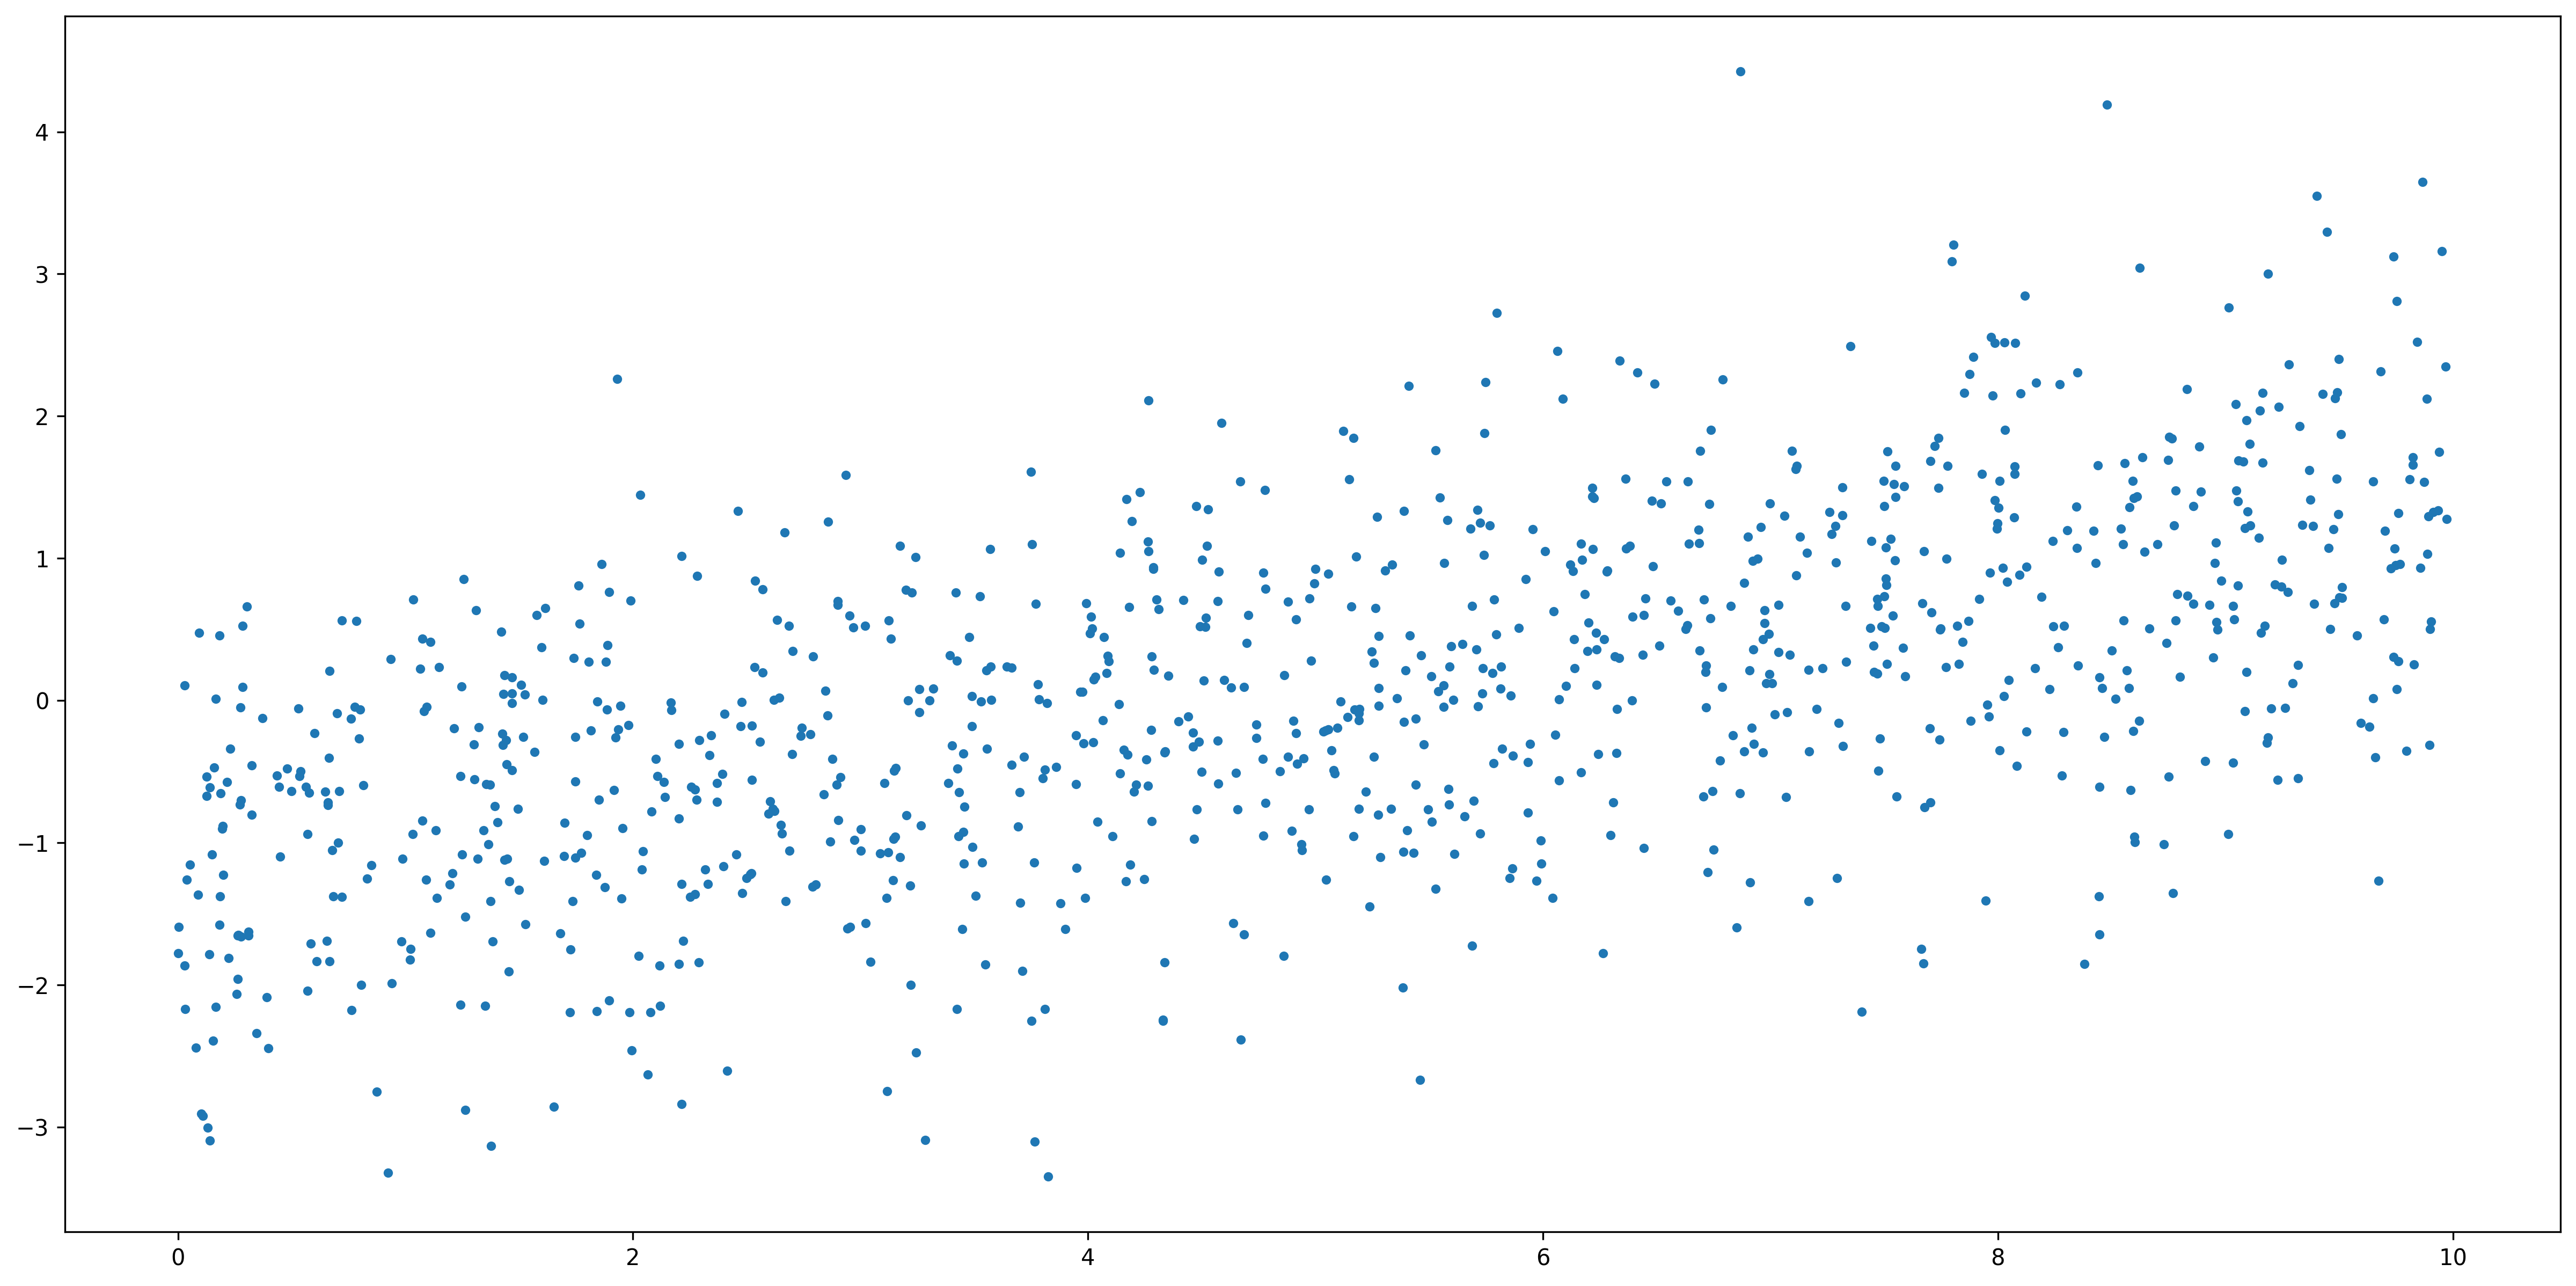

In [36]:
mpl.rcParams['figure.dpi'] = 300
plt.scatter(X, y, s= 10)

## Regressão linear com o Scikit-Learn